In [1]:
import fairlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 140

In [5]:
bios_both_results = fairlib.analysis.retrive_results("Bios_both", log_dir=r"..\Preprocessed_results")

In [6]:
bios_both_results.keys()

dict_keys(['Adv', 'BTFairBatch', 'BTGAdv', 'BTGDAdv', 'DAdv', 'FairBatch', 'GAdv', 'GDAdv', 'INLP', 'OldFairBatch', 'Vanilla'])

In [7]:
bios_both_results["INLP"]

epoch  \
INLP_by_class INLP_discriminator_reweighting INLP_min_acc index_epoch          
True          NaN                            0.0          0                0   
                                                          1                1   
                                                          10              10   
                                                          100            100   
                                                          101            101   
...                                                                      ...   
                                                          95              95   
                                                          96              96   
                                                          97              97   
                                                          98              98   
                                                          99              99   

                                                                       dev_fairness  \
INLP_by_class INLP_discriminator_reweighting INLP_min_acc index_epoch                 
True          NaN                            0.0          0                0.476941   
                                                          1                0.488219   
                                                          10               0.517145   
                                                          100              0.866368   
                                                          101              0.866368   
...                                                                             ...   
                                                          95               0.744230   
                                                          96               0.771471   
                                                          97               0.804900   
                                                          98               0.858262   
                                                          99               0.866368   

                                                                       dev_performance  \
INLP_by_class INLP_discriminator_reweighting INLP_min_acc index_epoch                    
True          NaN                            0.0          0                   0.804856   
                                                          1                   0.805130   
                                                          10                  0.805495   
                                                          100                 0.298649   
                                                          101                 0.298649   
...                                                                                ...   
                                                          95                  0.538335   
                                                          96                  0.491603   
                                                          97                  0.416210   
                                                          98                  0.344925   
                                                          99                  0.298649   

                                                                        dev_DTO  \
INLP_by_class INLP_discriminator_reweighting INLP_min_acc index_epoch             
True          NaN                            0.0          0            0.449499   
                                                          1            0.436480   
                                                          10           0.403092   
                                                          100          0.629780   
                                                          101          0.629780   
...                                                                         ...   
                                                          95   

(0.0, 110.0)

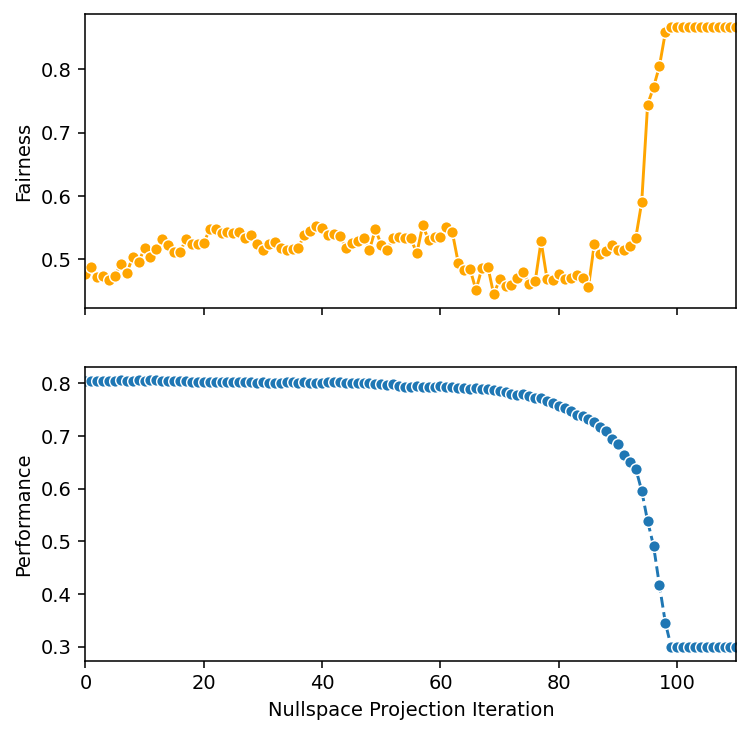

In [8]:
f, (a0, a1) = plt.subplots(2, 1, figsize=(6, 6), sharex=True)


sns.lineplot(
    data=bios_both_results["INLP"], 
    x="epoch", y="dev_fairness", ax=a0,legend=None,
    )

sns.lineplot(
    data=bios_both_results["INLP"], 
    x="epoch", y="dev_performance",ax=a1,legend=None,markers=True
    )

for _line in a0.lines:
    _line.set_marker("o")
    _line.set_color("orange")

for _line in a1.lines:
    _line.set_linestyle("--")
    _line.set_marker("o")

a0.set_ylabel("Fairness")
a1.set_ylabel("Performance")
a1.set_xlabel("Nullspace Projection Iteration")

a0.set_xlim((0,110))
# a0.legend(bbox_to_anchor=(1.3, 1.))
# a1.legend(bbox_to_anchor=(1.3, 1.))

# plt.savefig('Moji_vary_DD_size_full.pdf', format="pdf", dpi=960, bbox_inches='tight')

# sns.relplot(x="epoch", y="test_fairness", data=bios_both_results["INLP"])

# sns.relplot(x="epoch", y="test_performance", data=bios_both_results["INLP"])

In [9]:
iteration_results = []
for _element in bios_both_results["INLP"].values:
    iteration_results.append({
        "Epoch":_element[0],
        "Values":_element[1],
        "Metric":"Fairness",
    })

    iteration_results.append({
        "Epoch":_element[0],
        "Values":_element[2],
        "Metric":"Performance",
    })
INLP_per_Iteration = pd.DataFrame(iteration_results)

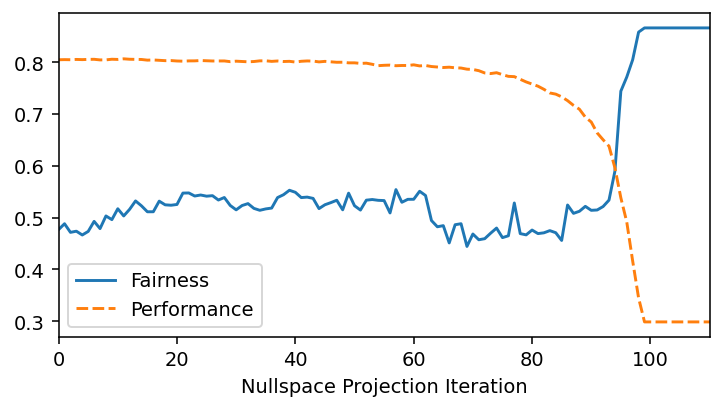

In [10]:
f, a0 = plt.subplots(1, 1, figsize=(6, 3), sharex=True)


sns.lineplot(
    data=INLP_per_Iteration, 
    x="Epoch", y="Values", 
    hue="Metric", style="Metric",
    ax=a0,
    )

a0.set_ylabel("")
a0.set_xlabel("Nullspace Projection Iteration")

a0.set_xlim((0,110))
a0.legend(title="")

plt.savefig('Bios_both_INLP_Iteration.pdf', format="pdf", dpi=960, bbox_inches='tight')

In [11]:
from fairlib.src.analysis.utils import is_pareto_efficient

In [12]:
bios_both_results["INLP"]["Pareto"] = is_pareto_efficient(
                -1*bios_both_results["INLP"][["dev_performance", "dev_fairness"]].to_numpy()
                )

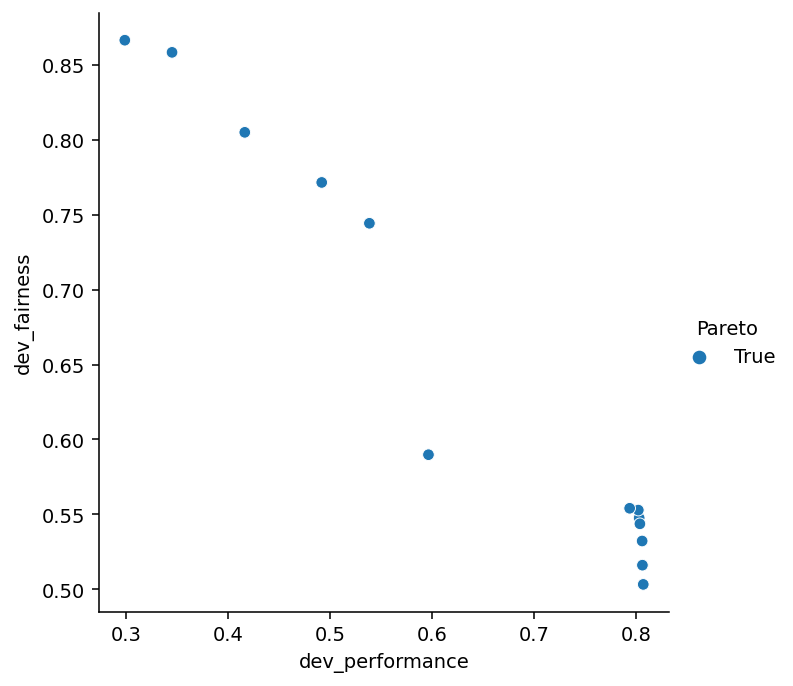

In [13]:
sns.relplot(
    data=bios_both_results["INLP"][bios_both_results["INLP"]["Pareto"]==True], 
    x="dev_performance", y="dev_fairness",
    hue="Pareto"
    )

In [14]:
# dict_keys(['Adv', 'BTFairBatch', 'BTGAdv', 'BTGDAdv', 'DAdv', 'FairBatch', 'GAdv', 'GDAdv', 'INLP', 'OldFairBatch', 'Vanilla'])

In [15]:
bios_both_results["AAdv"] = bios_both_results["BTGAdv"]

In [16]:
bios_both_plot_df = fairlib.analysis.final_results_df(
    model_order=["INLP", "Adv", "DAdv", "AAdv"],
    results_dict = bios_both_results,
    pareto = True,
    pareto_selection = "test",
    selection_criterion = None,
    return_dev = True,
    )

Text(0, 0.5, 'Fairness')

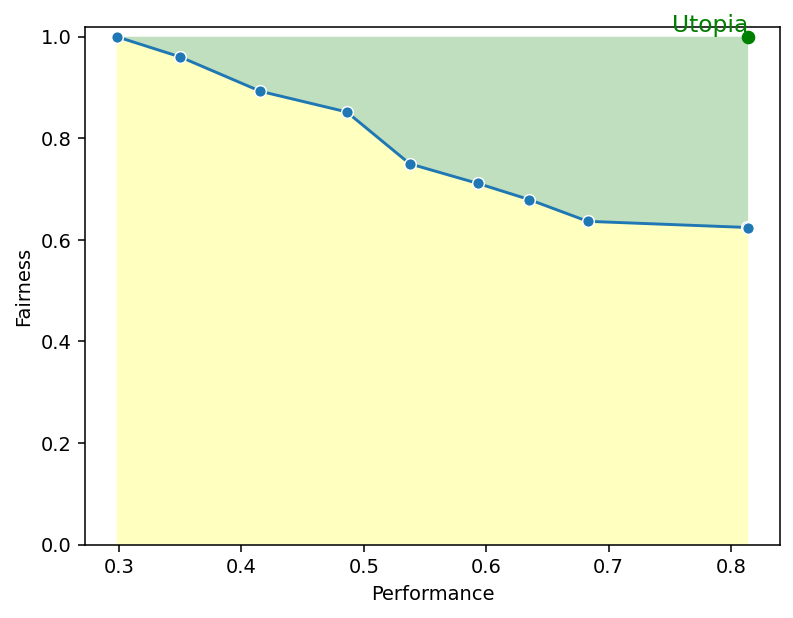

In [17]:
_pareto_df = bios_both_plot_df[bios_both_plot_df["Models"]=="INLP"]

image = sns.lineplot(
            data=_pareto_df,
            x="test_performance mean",
            y="test_fairness mean",
            hue="Models",
            markers=True,
            style="Models",
            legend=None
        )

_xlim = image.axes.get_xlim()
_ylim = image.axes.get_ylim()

_tmp_df = fairlib.src.analysis.utils.auc_performance_fairness_tradeoff(
    _pareto_df,
    random_performance = 0.3,
    # performance_threshold = 0.70, 
    # interpolation = "constant",
    interpolation = "linear",
    )[1]

plt.fill_between(_tmp_df["test_performance mean"], _tmp_df["test_fairness mean"], 1, facecolor='green', alpha=0.25)
plt.fill_between(_tmp_df["test_performance mean"], _tmp_df["test_fairness mean"], 0, facecolor='yellow', alpha=0.25)

max_fairness = max(_pareto_df["test_fairness mean"])
max_performance = max(_pareto_df["test_performance mean"])

plt.plot(max_performance, max_fairness, "go")
plt.text(max_performance, max_fairness, "Utopia", c="g",horizontalalignment='right',verticalalignment='bottom', fontsize=12)

plt.xlim(_xlim)
plt.ylim((0,_ylim[1]))

plt.xlabel("Performance")
plt.ylabel("Fairness")

# plt.savefig('Bios_both_INLP_AUC.pdf', format="pdf", dpi=960, bbox_inches='tight')

In [18]:
bios_both_plot_df

,index,test_performance mean,test_performance std,test_fairness mean,test_fairness std,dev_performance mean,dev_performance std,dev_fairness mean,dev_fairness std,epoch list,opt_dir list,is_pareto,Models,dev_DTO mean
0,24,0.813543,NaN,0.624426,NaN,0.803395,NaN,0.543710,NaN,[24],[G:\Experimental_results\INLP\Bios_both\INLP_T...,True,INLP,0.496844
1,26,0.814046,NaN,0.623238,NaN,0.802483,NaN,0.542419,NaN,[26],[G:\Experimental_results\INLP\Bios_both\INLP_T...,True,INLP,0.498391
2,90,0.683028,NaN,0.636529,NaN,0.684648,NaN,0.514129,NaN,[90],[G:\Experimental_results\INLP\Bios_both\INLP_T...,True,INLP,0.579239
3,93,0.635273,NaN,0.679288,NaN,0.638007,NaN,0.533857,NaN,[93],[G:\Experimental_results\INLP\Bios_both\INLP_T...,True,INLP,0.590194
4,94,0.593264,NaN,0.711116,NaN,0.596203,NaN,0.589823,NaN,[94],[G:\Experimental_results\INLP\Bios_both\INLP_T...,True,INLP,0.575584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,35,0.697347,0.048982,0.788206,0.077229,0.692954,0.047431,0.752005,0.054383,"[17, 2, 18, 4, 18]",[G:\Experimental_results\hypertune4\Bios_both\...,True,AAdv,0.394689
63,36,0.689692,0.016720,0.818750,0.063414,0.684575,0.016188,0.754430,0.042387,"[2, 4, 8, 19, 3]",[G:\Experimental_results\hypertune4\Bios_both\...,True,AAdv,0.399747
64,38,0.566651,0.168202,0.872824,0.106238,0.559712,0.164671,0.807181,0.055836,"[9, 11, 9, 7, 0]",[G:\Experimental_results\hypertune4\Bios_both\...,True,AAdv,0.480659
65,39,0.471746,0.170385,0.928964,0.103499,0.467452,0.165697,0.833885,0.063428,"[9, 0, 9, 0, 11]",[G:\Experimental_results\hypertune4\Bios_both\...,True,AAdv,0.557855


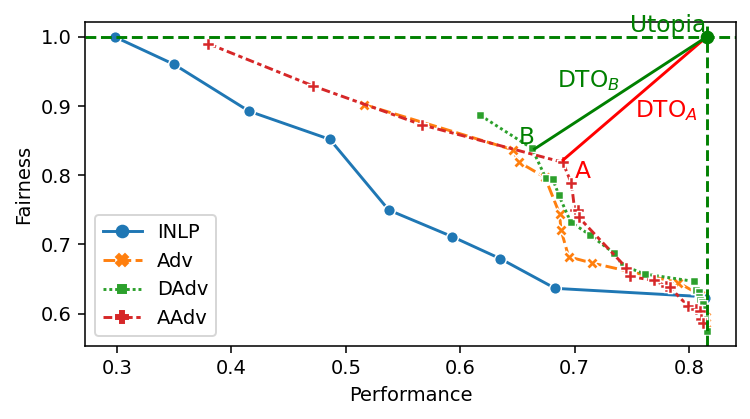

In [19]:
f, a0 = plt.subplots(1, 1, figsize=(6, 3), sharex=True)

sns.lineplot(
    data=bios_both_plot_df,
    x="test_performance mean",
    y="test_fairness mean",
    hue="Models",
    markers=True,
    style="Models",
    ax=a0,
)

max_fairness = max(bios_both_plot_df["test_fairness mean"])
max_performance = max(bios_both_plot_df["test_performance mean"])
plt.axvline(max_performance, ls="--", color='g') # vertical
plt.axhline(max_fairness, ls="--", color='g') # horizontal


plt.text(max_performance, max_fairness, "Utopia", c="g",horizontalalignment='right',verticalalignment='bottom', fontsize=12)

plt.plot([0.69, max_performance], [0.822, max_fairness], 'r')
plt.text(0.70, 0.822, "A", c="r",horizontalalignment='left',verticalalignment='top', fontsize=12)

plt.text((0.69+max_performance)/2, (0.822+max_fairness)/2, "DTO$_A$", c="red",horizontalalignment='left',verticalalignment='top', fontsize=12)

plt.plot([0.665, max_performance], [0.838, max_fairness], 'g')
plt.text(0.665, 0.838, "B", c="g",horizontalalignment='right',verticalalignment='bottom', fontsize=12)
plt.text((0.665+max_performance)/2, (0.838+max_fairness)/2, "DTO$_B$", c="g",horizontalalignment='right',verticalalignment='bottom', fontsize=12)

plt.plot(max_performance, max_fairness, "go")
a0.legend(loc= "lower left",)

plt.xlabel("Performance")
plt.ylabel("Fairness")

plt.savefig('Bios_both_sample_tradeoffs.pdf', format="pdf", dpi=960, bbox_inches='tight')